classes:
[[1 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]]


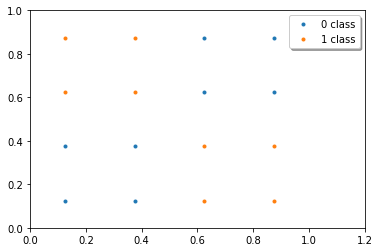

y_train == model.predict(x_train): True
result:
 [[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


In [2]:
# First
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import sys

sys.path.append("../..")
from lib.custom import hard_lim
from lab0.src import dataset1

y_train = np.array([[1, 1, 0, 0],
                    [1, 1, 0, 0],
                    [0, 0, 1, 1],
                    [0, 0, 1, 1]])

# load data from dataset1
(x_train, y_train) = dataset1.load_data(y_train=y_train, show=True)

# creating model with weights initialization
model = Sequential()
# we get 4 equations y(i) =  x(1,2) - 0.5 = 0
model.add(Dense(4, input_dim=x_train.shape[1], activation=hard_lim, name='First',
                weights=list([np.array([[0.0, 1.0, 0.0, -1.0],  # x1
                                        [1.0, 0.0, -1.0, 0.0]], dtype=float),
                              np.array([-0.5, -0.5, 0.5, 0.5], dtype=float)])))
# we get 2 equations y1 + y2 - 1.5 = 0 and y3 + y4 - 1.5 = 0
model.add(Dense(2, activation=hard_lim, name='Second',
                weights=list([np.array([[1.0, 0.0],  # y1
                                        [1.0, 0.0],  # y2
                                        [0.0, 1.0],  # y3
                                        [0.0, 1.0]], dtype=float),
                              np.array([-1.5, -1.5], dtype=float)])))
model.add(Dense(1, activation=hard_lim, name='Third',
                weights=list([np.array([[1.0], [1.0]], dtype=float),
                              np.array([-0.5], dtype=float)])))

# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# checking that model is working correctly
compareResult = np.array_equal(model.predict(x_train).reshape(4, 4).reshape(y_train.shape), y_train)

print("y_train == model.predict(x_train):", compareResult)
print("result:\n", model.predict(x_train).reshape(4, 4))


In [5]:
# Second
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import sys

sys.path.append("../..")
from lib.custom import hard_lim
from lab0.src import dataset2

# load data from dataset2
(x_train, y_train) = dataset2.load_data()

# creating model with weights initialization
model = Sequential()

DNF = np.array([[-1, -1, -1, -1, 1],
                [-1, -1, 1, -1, -1],
                [1, -1, -1, -1, -1],
                [0, 1, -1, -1, 1]])

model.add(Dense(4, input_dim=x_train.shape[1], activation=hard_lim, name='First',
                weights=list([np.transpose(DNF),
                              np.array([-0.5, -0.5, -0.5, -1.5], dtype=float)])))
model.add(Dense(1, activation=hard_lim, name='Second',
                weights=list(
                    [np.array([[1.0], [1.0], [1.0], [1.0]], dtype=float), np.array([-0.5], dtype=float)])))

# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

print("СДНФ")
print(dataset2.func.__doc__)
# checking that model is working correctly
compareResult = np.array_equal(model.predict(x_train).reshape(y_train.shape), y_train)
print("\ny_train == model.predict(x_train):", compareResult)


СДНФ

    ~x1 & ~x2 & ~x3 & ~x4 & x5  |
    ~x1 & ~x2 & x3 & ~x4 & ~x5  |
    x1 & ~x2 & ~x3 & ~x4 & ~x5  |
    x2 & ~x3 & ~x4 & x5
    

y_train == model.predict(x_train): True


y_train == model.predict(x_train)? True
Accuracy = 100%


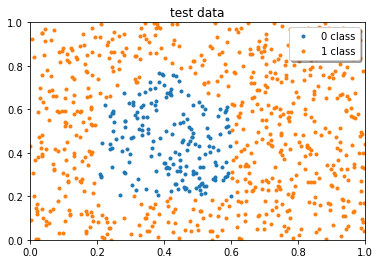

In [6]:
# Third
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import sys

sys.path.append("../..")
from lib.custom import hard_lim
from lab0.src import dataset3

train_size = 4000
# load data from dataset1
(x_train, y_train), (x_test, y_test) = dataset3.load_data(train_size=train_size, show=False)

# creating model with weights initialization
model = Sequential()

model.add(Dense(6, input_dim=x_train.shape[1], activation=hard_lim, name='First',
                weights=list([np.array([[0.0, 0.0, 1.0, 1.0, 1.0, -1.0],
                                        [1.0, 1.0, 0.0, 0.0, 1.0, 1.0]], dtype=float),
                              np.array([-0.6, -0.2, -0.6, -0.2, -1.2, -0.4], dtype=float)])))

model.add(Dense(2, activation=hard_lim, name='Second',
                weights=list([np.array([[-1.0, 1.0],  # y1
                                        [1.0, 0.0],  # y2
                                        [-1.0, 0.0],  # y3
                                        [1.0, 0.0],  # y4
                                        [0.0, -1.0],  # y5
                                        [0.0, -1.0]],  # y6
                                       dtype=float),
                              np.array([-1.5, -0.5], dtype=float)])))

model.add(Dense(1, activation=hard_lim, name='Third',
                weights=list([np.array([[1.0],
                                        [1.0]], dtype=float),
                              np.array([-0.5], dtype=float)])))

# checking that model is working correctly
compareResult = np.array_equal(model.predict(x_train).reshape(y_train.shape), y_train)
print("y_train == model.predict(x_train)?", compareResult)

i = 0
right = 0
for pr in model.predict(x_train):
    if y_train[i] == pr:
        right += 1
    i += 1

print("Accuracy = %.f%%" % (right / float(train_size) * 100))


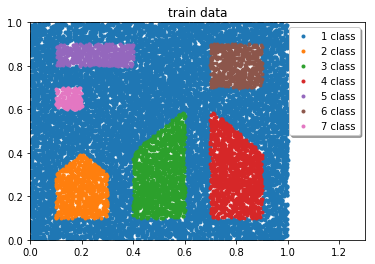

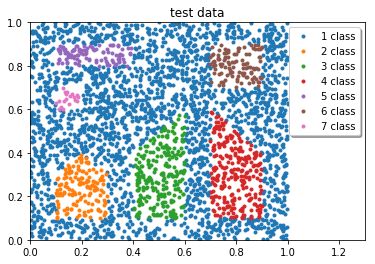

Accuracy = 94%


In [7]:
# Fourth
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import sys

sys.path.append("../..")
from lib.custom import hard_lim
from lab0.src import dataset4

train_size = 16000

(x_train, y_train), (x_test, y_test) = dataset4.load_data(train_size=train_size, show=True)

model = Sequential()

x1 = [.0, .0, .0, .0, .0, .0, .0, 1., 1., 1., 1., 1., 1., 1., 1., 1., -1., -1.]
x2 = [1., 1., 1., 1., 1., 1., 1., .0, .0, .0, .0, .0, .0, .0, 1., 1., 1., 1.]
b = [-.9, -.8, -.7, -.6, -.4, -.3, -.1, -.9, -.7, -.6, -.4, -.3, -.2, -.1, -1.3, -0.6, 0.0, -0.2]

model.add(Dense(18, input_dim=x_train.shape[1], activation=hard_lim, name='First',
                weights=list([np.array([x1, x2], dtype=float),
                              np.array(b, dtype=float)])))

model.add(Dense(9, activation=hard_lim, name='Second',
                weights=list([np.array([[.0, .0, .0, .0, .0, .0, -1., -1., .0],  # y1
                                        [.0, .0, .0, .0, .0, .0, 1., .0, .0],  # y2
                                        [.0, .0, .0, .0, .0, .0, .0, 1., -1.],  # y3
                                        [.0, .0, .0, .0, .0, .0, .0, .0, 1.],  # y4
                                        [.0, .0, -1., 1., -1., 1., .0, .0, .0],  # y5
                                        [-1., 1., .0, .0, .0, .0, .0, .0, .0],  # y6
                                        [1., .0, 1., .0, 1., .0, .0, .0, .0],  # y7
                                        [.0, .0, .0, .0, -1., .0, .0, -1., .0],  # y8
                                        [.0, .0, .0, .0, 0., 1., .0, 1., .0],  # y9
                                        [.0, .0, -1., -1., .0, .0, .0, .0, .0],  # y10
                                        [.0, .0, 1., .0, .0, .0, -1., .0, .0],  # y11
                                        [-1., .0, .0, .0, .0, .0, .0, .0, .0],  # y12
                                        [.0, .0, .0, .0, .0, .0, .0, .0, -1.],  # y13
                                        [1., .0, .0, .0, .0, .0, 1., .0, 1.],  # y14
                                        [.0, .0, .0, .0, .0, -1., .0, .0, .0],  # y15
                                        [.0, -1., .0, .0, .0, .0, .0, .0, .0],  # y16
                                        [.0, .0, .0, -1., .0, .0, .0, .0, .0],  # y17
                                        [.0, -1., .0, .0, .0, .0, .0, .0, .0]], dtype=float),  # y18
                              np.array([-1.5, -0.5, -1.5, -0.5, -1.5, -1.5, -1.5, -1.5, -1.5], dtype=float)])))

model.add(Dense(6, activation=hard_lim, name='Third',
                weights=list([np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                                        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                                        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                                        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                                        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
                                        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
                                        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
                                        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                                        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]], dtype=float),
                              np.array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5], dtype=float)])))

i = 0
right = 0
for pr in model.predict(x_train):
    if np.array_equal(pr, y_train[i]):
        right += 1
    i += 1
print("Accuracy = %.f%%" % (right / float(train_size) * 100))


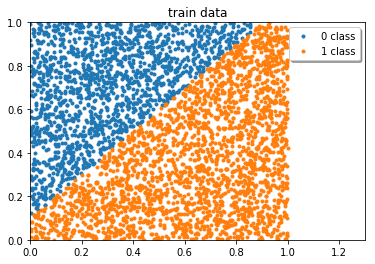

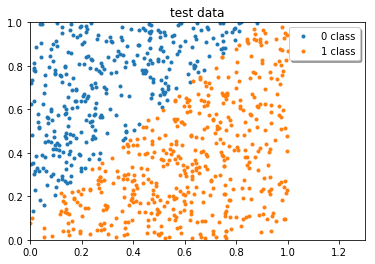

Epoch 1/50
4000/4000 [==============================] - 0s 81us/step - loss: 0.1552 - acc: 0.8485
Epoch 2/50
4000/4000 [==============================] - 0s 37us/step - loss: 0.1165 - acc: 0.9287
Epoch 3/50
4000/4000 [==============================] - 0s 37us/step - loss: 0.0972 - acc: 0.9512
Epoch 4/50
4000/4000 [==============================] - 0s 39us/step - loss: 0.0860 - acc: 0.9635
Epoch 5/50
4000/4000 [==============================] - 0s 39us/step - loss: 0.0785 - acc: 0.9677
Epoch 6/50
4000/4000 [==============================] - 0s 38us/step - loss: 0.0730 - acc: 0.9692
Epoch 7/50
4000/4000 [==============================] - 0s 37us/step - loss: 0.0687 - acc: 0.9737
Epoch 8/50
4000/4000 [==============================] - 0s 38us/step - loss: 0.0653 - acc: 0.9730
Epoch 9/50
4000/4000 [==============================] - 0s 38us/step - loss: 0.0625 - acc: 0.9775
Epoch 10/50
4000/4000 [==============================] - 0s 39us/step - loss: 0.0601 - acc: 0.9785
Epoch 11/50
4000/40

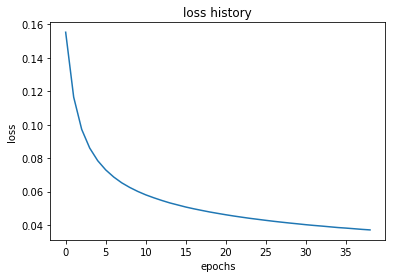

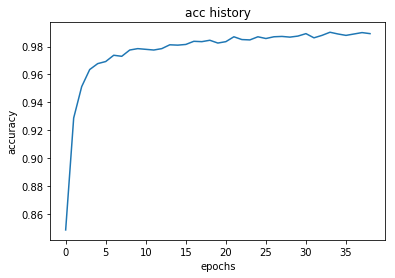

In [9]:
# ex5_1(linear function)
from keras import Sequential, callbacks
from keras.layers import Dense
from keras.optimizers import SGD
import sys

sys.path.append('../..')

from lab0.src import dataset5
import lib.gui_reporter as gr

train_size = 4000

first_layer_nur = 1
lr = 0.3
batch_size = 20
epochs = 50
verbose = 1

(x_train, y_train), (x_test, y_test) = dataset5.load_data(train_size=train_size, show=True, func_type='lin', k=1, b=0.1)

model = Sequential()

model.add(Dense(1, kernel_initializer='glorot_normal', activation='hard_sigmoid'))

# early stop
stopper = callbacks.EarlyStopping(monitor='acc', min_delta=0, patience=5, mode='max')

model.compile(loss='mean_squared_error', optimizer=SGD(lr=lr), metrics=['accuracy'])

# batch_size define speed of studying
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[stopper], verbose=verbose)

score = model.evaluate(x_test, y_test, verbose=1)

print("Accuracy on train data\t %.f%%" % (history.history['acc'][stopper.stopped_epoch] * 100))
print("Accuracy on testing data %.f%%" % (score[1] * 100))
print("Loss on train data %.f%%" % (history.history['loss'][stopper.stopped_epoch] * 100))
gr.plot_history_separte(history, save_path_acc="ACC.png", save_path_loss="LOSS.png",
                        save=False, show=True)


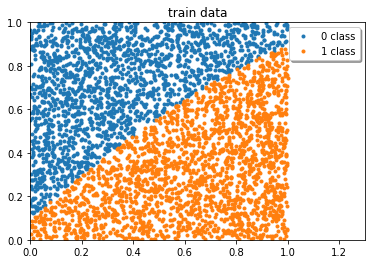

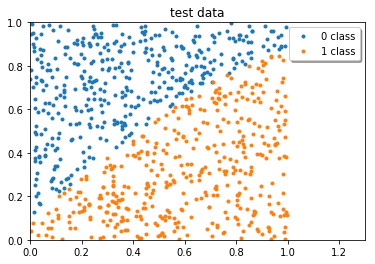

Epoch 1/50
4000/4000 [==============================] - 0s 87us/step - loss: 0.2051 - acc: 0.7628
Epoch 2/50
4000/4000 [==============================] - 0s 38us/step - loss: 0.1372 - acc: 0.9302
Epoch 3/50
4000/4000 [==============================] - 0s 39us/step - loss: 0.1066 - acc: 0.9620
Epoch 4/50
4000/4000 [==============================] - 0s 39us/step - loss: 0.0909 - acc: 0.9747
Epoch 5/50
4000/4000 [==============================] - 0s 38us/step - loss: 0.0813 - acc: 0.9800
Epoch 6/50
4000/4000 [==============================] - 0s 38us/step - loss: 0.0746 - acc: 0.9805
Epoch 7/50
4000/4000 [==============================] - 0s 38us/step - loss: 0.0696 - acc: 0.9805
Epoch 8/50
4000/4000 [==============================] - 0s 40us/step - loss: 0.0657 - acc: 0.9820
Epoch 9/50
4000/4000 [==============================] - 0s 40us/step - loss: 0.0626 - acc: 0.9825
Epoch 10/50
4000/4000 [==============================] - 0s 42us/step - loss: 0.0600 - acc: 0.9797
Epoch 11/50
4000/40

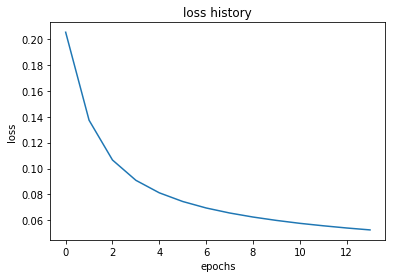

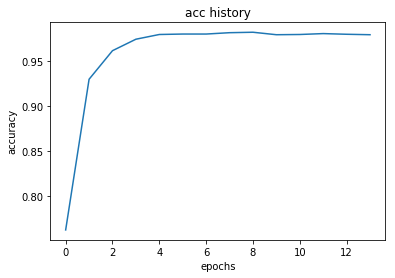

In [11]:
# ex5_2(non linear function)
from keras import Sequential, callbacks
from keras.layers import Dense
from keras.optimizers import SGD
import sys

sys.path.append('../..')

from lab0.src import dataset5
import lib.gui_reporter as gr

train_size = 4000

first_layer_nur = 1
lr = 0.3
batch_size = 20
epochs = 50
verbose = 1

(x_train, y_train), (x_test, y_test) = dataset5.load_data(train_size=train_size, show=True, func_type='n_lin', k=1,
                                                          b=0.1)

model = Sequential()

model.add(Dense(1, kernel_initializer='glorot_normal', activation='hard_sigmoid'))

# early stop
stopper = callbacks.EarlyStopping(monitor='acc', min_delta=0, patience=5, mode='max')

model.compile(loss='mean_squared_error', optimizer=SGD(lr=lr), metrics=['accuracy'])

# batch_size define speed of studying
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[stopper], verbose=verbose)

score = model.evaluate(x_test, y_test, verbose=1)

print("Accuracy on train data\t %.f%%" % (history.history['acc'][stopper.stopped_epoch] * 100))
print("Accuracy on testing data %.f%%" % (score[1] * 100))
print("Loss on train data %.f%%" % (history.history['loss'][stopper.stopped_epoch] * 100))
gr.plot_history_separte(history, save_path_acc="ACC.png", save_path_loss="LOSS.png",
                        save=False, show=True)
